# Enabling AI Systems - Assignment 2
Trystan May
Started Saturday, September 17th, 2022

## Question 1 - Account Info

**Docker**: duke0200
**GitHub**: Duke02

`docker run --restart=unless-stopped -it -p 8888:8888 -p 8787:8787 -p 5000:5000 -v /home/duke_trystan/PycharmProjects/EnablingAISystems:/rapids/notebooks/workspace jhebeler/classtank:705.603.jupyterlab
`

![JupyterLabProof](../jupyter_lab_proof.png)

## Question 2

In [1]:
import os
import cv2 as cv
import numpy as np
import typing as tp
import matplotlib.pyplot as plt

In [2]:
base_data_path: str = os.path.join('..', 'data', 'Assign2')

image_paths: tp.List[str] = [os.path.join(base_data_path, pic_fp) for pic_fp in os.listdir(base_data_path) if pic_fp.endswith('.jpg')]
image_paths

['../data/Assign2/BikeShot1.jpg',
 '../data/Assign2/BikeShot4.jpg',
 '../data/Assign2/BikeShot2.jpg',
 '../data/Assign2/BikeShot3.jpg']

```py
# Resizing of Image
# dsize
src=img
dsize = (425, 425)

# resize image
output = cv2.resize(src, dsize, interpolation = cv2.INTER_AREA)
height = output.shape[0]
width = output.shape[1]
print(height, width)
```

In [3]:
def sigmoid(x: np.ndarray, intensity_range: np.ndarray, intensity_center: np.ndarray) -> np.ndarray:
    # Got this equation from Wikipedia: https://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    # it's in the paragraph talking about non-linear normalization.
    return 1 / (1 + np.exp(-(x - intensity_center) / intensity_range))

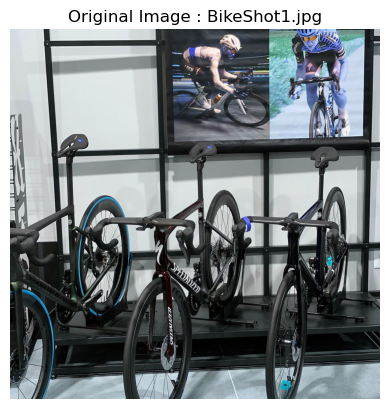

Original Image Shape: (1439, 1440, 3)
Resized Image Shape: (400, 400, 3)


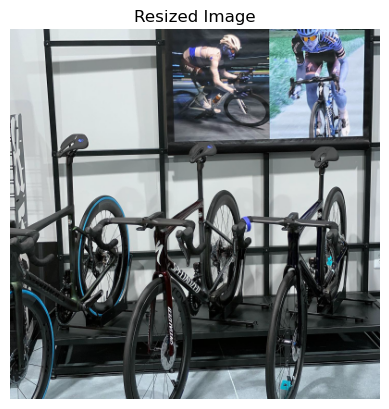

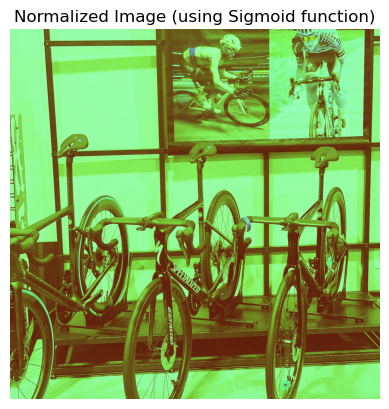

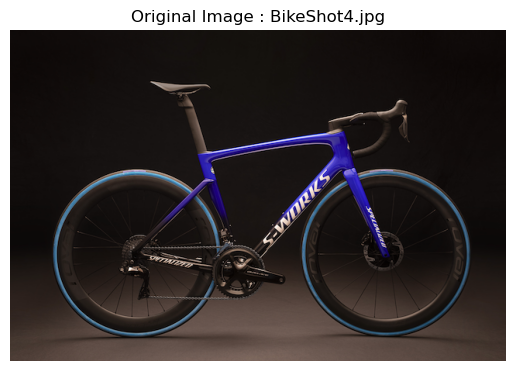

Original Image Shape: (427, 640, 3)
Resized Image Shape: (400, 400, 3)


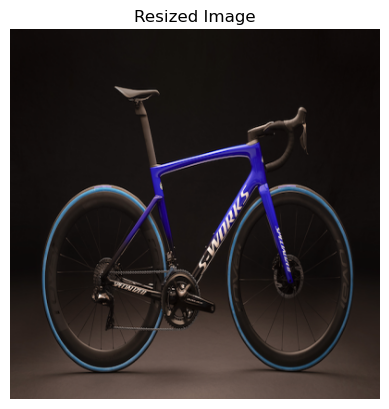

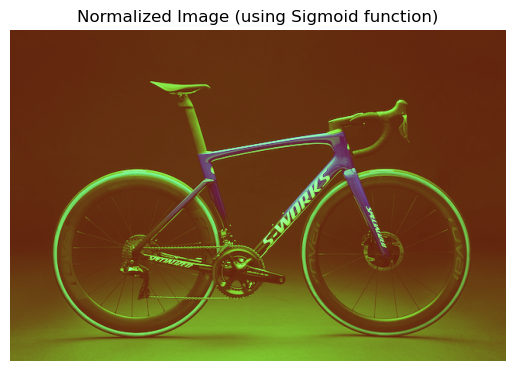

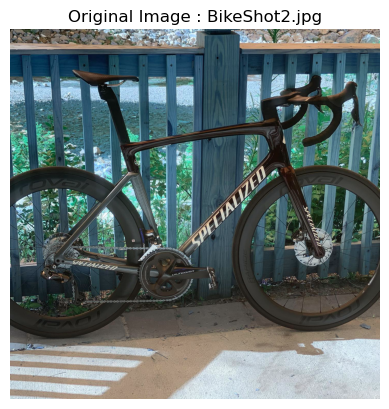

Original Image Shape: (1440, 1440, 3)
Resized Image Shape: (400, 400, 3)


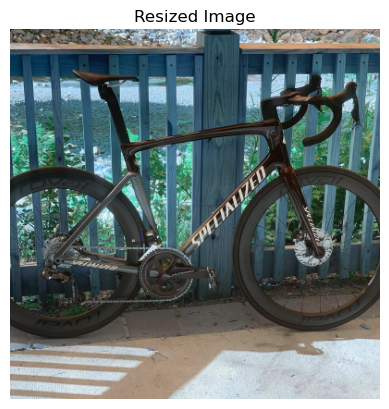

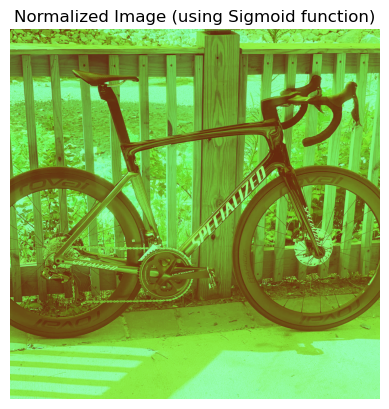

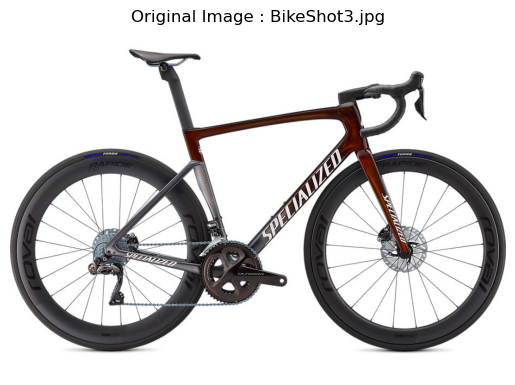

Original Image Shape: (640, 920, 3)
Resized Image Shape: (400, 400, 3)


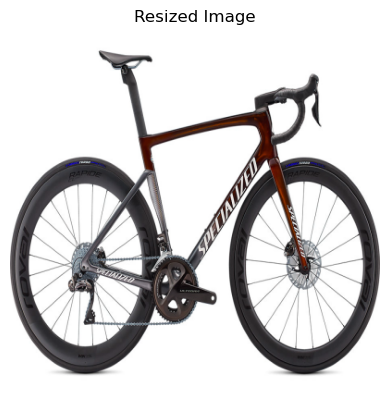

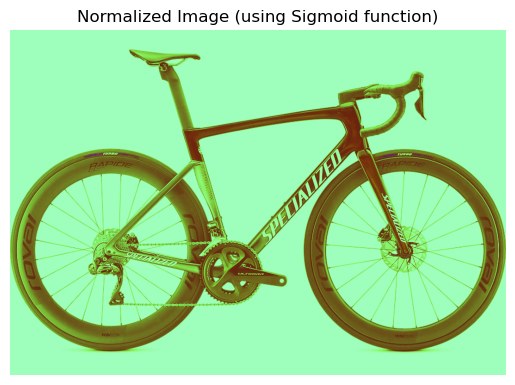

<Figure size 640x480 with 0 Axes>

In [4]:
for img_path in image_paths:
    plt.clf()

    # Ok so going off of the module code, I *should* be getting really weird coloring for this images.
    curr_image: np.ndarray = cv.imread(img_path)

    plt.imshow(curr_image)
    plt.title(f'Original Image : {os.path.basename(img_path)}')
    plt.axis('off')
    plt.show()

    plt.clf()

    # Resize and plot image.
    target_size: tp.Tuple[int, int] = (400, 400)
    resized_img: np.ndarray = cv.resize(curr_image, target_size, interpolation=cv.INTER_AREA)
    print(f'Original Image Shape: {curr_image.shape}')
    print(f'Resized Image Shape: {resized_img.shape}')

    plt.imshow(resized_img)
    plt.title(f'Resized Image')
    plt.axis('off')
    plt.show()

    plt.clf()

    intensity_range: np.ndarray = np.array([255, 32, 64])
    intensity_center: np.ndarray = np.array([128, 64, 188])
    normalized_image: np.ndarray = sigmoid(curr_image, intensity_range, intensity_center)

    plt.imshow(normalized_image)
    plt.title('Normalized Image (using Sigmoid function)')
    plt.axis('off')
    plt.show()

    plt.clf()
